# Grundlegende Einstellungen
Basierend auf einer [Anleitung](https://gist.github.com/ShawnHymel/79237fe6aee5a3653c497d879f746c0c) von [Shawn Hymel](https://gist.github.com/ShawnHymel)

Erweitert von [Niklas Weber](https://github.com/nikipediaweber)

Tensorflow Version 2.1 verwenden:

In [1]:
%tensorflow_version 2.1

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Benötigte libraries importieren:

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers


Verwendete Versionen ausgeben:

In [3]:
!python --versions
print('Numpy' + np.__version__)
print('Tensorflow' + tf.__version__)
#print('Keras' + tf.keras.__version__)

unknown option --versions
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy1.23.5
Tensorflow2.14.0


Einstellungen für Datensatzerzeugung:


In [4]:
nsamples = 1000     #Anzahl der Daten im Datensatz
val_ratio = 0.2     #Prozentsatz der Daten, die für validation beiseitegelegt werden
test_ratio = 0.2    #Prozentsatz der Daten, die für das Testen beiseitegelegt werden

Einstellungen für das Modell

In [5]:
#Name des Modells festlegen
tflite_model_name = 'sine_model' #wird mit .tflite am Ende abgespeichert
c_model_name = 'sine_model'      #wird mit .h am Ende abgespeichert

# Erzeugen der Trainings-, Validierungs- und Testdaten


Zufälllige Werte zwischen 0 und 2pi generieren. Diese werden als x-Werte der Sinusfunktion verwendet.

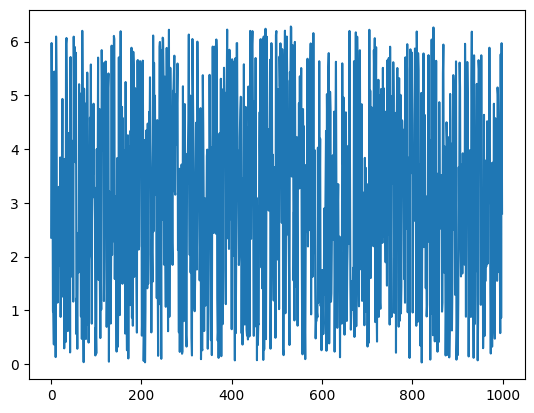

In [6]:
np.random.seed(42)
x_values = np.random.uniform(low=0, high=(2*math.pi), size = nsamples)
plt.plot(x_values)

Berechnen der den x Werten zugehörigen y Werte:


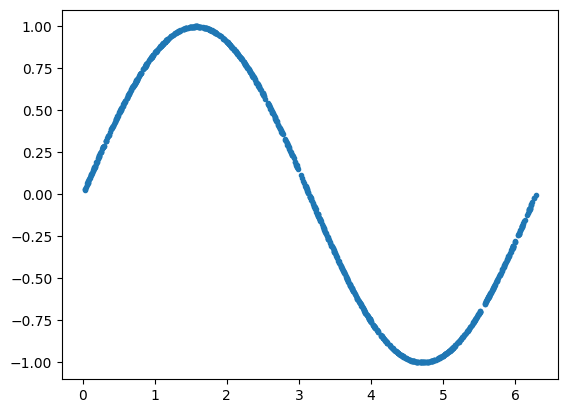

In [7]:
y_values_clean = np.sin(x_values)
plt.plot(x_values,y_values_clean,'.')

Nun noch mit Gaußschem Rauschen um die ungenauigkeit der Testdaten zu simulieren:

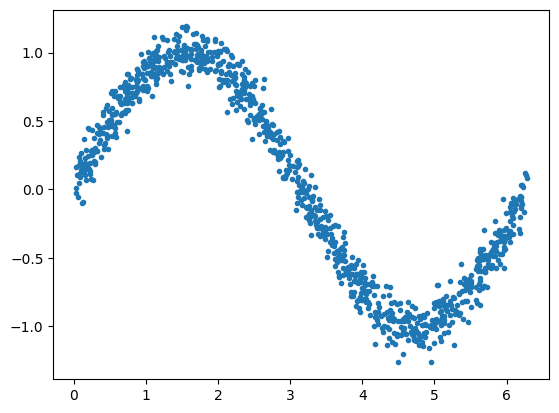

In [8]:
y_values = np.sin(x_values)+(0.1*np.random.randn(x_values.shape[0]))
plt.plot(x_values,y_values,'.')

Aufteilen in Trainings-, Validierungs- und Testdaten

In [9]:
val_split = int(val_ratio * nsamples) #bestimmen, wie viel Validierungsdaten benötigt werden
test_split = int(val_split+ (val_ratio * nsamples)) #bestimmen, wie viel Testdaten benötigt werden

#aufteilen der x-, und y-Daten
x_val,x_test,x_train = np.split(x_values, [val_split, test_split])
y_val,y_test,y_train = np.split(y_values, [val_split, test_split])

#Überprüfen ob das Aufteilen korrekt vollzogen wurde
assert(x_train.size + x_val.size + x_test.size) == nsamples
assert(y_train.size + y_val.size + y_test.size) == nsamples

Ploten der jeweiligen Datensätze:

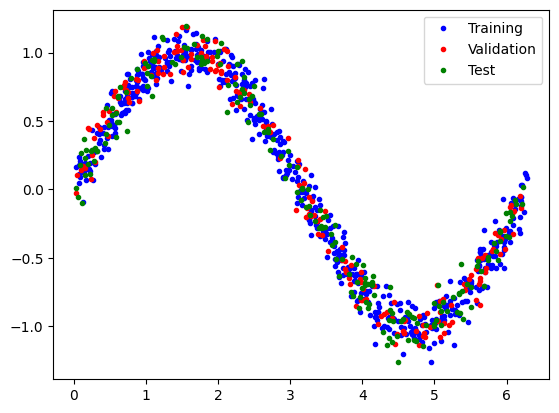

In [10]:
plt.plot(x_train,y_train,'b.', label = "Training")
plt.plot(x_val,y_val,'r.', label = "Validation")
plt.plot(x_test,y_test,'g.', label = "Test")
plt.legend()
plt.show()

# Erstellen und trainieren des Modells

In [11]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

Überblick über Modell ausgeben:

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Gewünscheten optimizer, loss-Funktion und Metrics definieren und dann das Modell komplieren: (in unserem Fall mit optimizer: rmsprop, loss-Funktion: mean absolute error )

In [13]:
model.compile(optimizer = 'rmsprop', loss='mae', metrics=['mae'])

Trainieren des Modells

In [14]:
history=model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=100,
    validation_data=(x_val,y_val)
)

Epoch 1/500
6/6 [==============================] - 5s 41ms/step - loss: 0.8450 - mae: 0.8450 - val_loss: 0.7975 - val_mae: 0.7975
Epoch 2/500
6/6 [==============================] - 0s 11ms/step - loss: 0.7113 - mae: 0.7113 - val_loss: 0.6979 - val_mae: 0.6979
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6303 - mae: 0.6303 - val_loss: 0.6354 - val_mae: 0.6354
Epoch 4/500
6/6 [==============================] - 0s 11ms/step - loss: 0.5867 - mae: 0.5867 - val_loss: 0.6002 - val_mae: 0.6002
Epoch 5/500
6/6 [==============================] - 0s 11ms/step - loss: 0.5613 - mae: 0.5613 - val_loss: 0.5822 - val_mae: 0.5822
Epoch 6/500
6/6 [==============================] - 0s 8ms/step - loss: 0.5475 - mae: 0.5475 - val_loss: 0.5708 - val_mae: 0.5708
Epoch 7/500
6/6 [==============================] - 0s 11ms/step - loss: 0.5377 - mae: 0.5377 - val_loss: 0.5618 - val_mae: 0.5618
Epoch 8/500
6/6 [==============================] - 0s 13ms/step - loss: 0.5297 - mae: 0.5297

Plotten des Trainingsvorganges

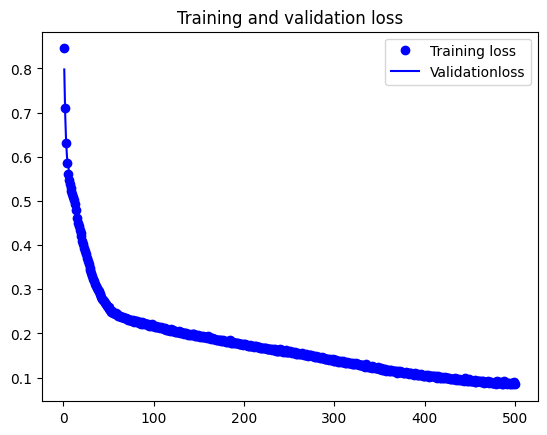

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validationloss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Testen des Modells

7/7 [==============================] - 0s 3ms/step


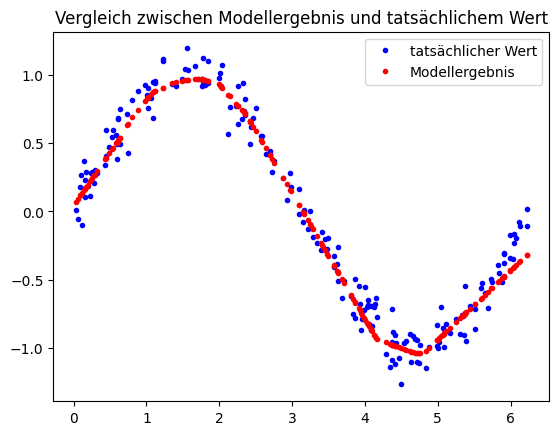

In [18]:
predictions = model.predict(x_test)

plt.clf()
plt.title("Vergleich zwischen Modellergebnis und tatsächlichem Wert")
plt.plot(x_test,y_test,'b.',label = 'tatsächlicher Wert')
plt.plot(x_test,predictions,'r.',label = 'Modellergebnis')
plt.legend()
plt.show()

#Konvertieren des Keras Modells zu tflite

In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
open(tflite_model_name +'.tflite','wb').write(tflite_model)

3168

Erzeugen von C-Code aus der tflite-Datei

In [24]:
#Funktion, die Hex-Werte in ein Array konvertiert

def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str


Schreiben des Modells in eine C-Datei

In [25]:
with open(c_model_name + '.h','w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))